# Import Required Libraries
Import TensorFlow, NumPy, Matplotlib, and any other necessary libraries.

In [1]:
# Import necessary libraries
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import os

# Load Pre-trained Model
Load the pre-trained OCR model using TensorFlow's `load_model` function.

In [2]:
# Load the pre-trained OCR model
from tensorflow.keras.models import load_model

# Path to the pre-trained model file
model_path = "mejor_modelo_ocr.h5"

# Load the model
ocr_model = load_model(model_path)

# Confirm the model is loaded
print("Model loaded successfully!")

Model loaded successfully!


# Load and Preprocess Images
Load images from a specified directory, preprocess them to match the input shape of the model, and normalize pixel values.

In [4]:
# Load and preprocess a single image
def load_and_preprocess_image(image_path, img_height=100, img_width=280):
    """
    Load a single image, preprocess it to match the model input shape,
    and normalize pixel values.
    
    Args:
        image_path (str): Path to the image file.
        img_height (int): Height of the image expected by the model.
        img_width (int): Width of the image expected by the model.
    
    Returns:
        np.ndarray: Preprocessed image ready for prediction.
    """
    # Load the image in grayscale mode and resize it
    img = load_img(image_path, color_mode="grayscale", target_size=(img_height, img_width))
    
    # Convert the image to a numpy array and normalize pixel values
    img_array = img_to_array(img) / 255.0
    
    # Add a batch dimension to the image
    img_array = np.expand_dims(img_array, axis=0)
    
    return img_array

# Example usage
image_path = "../matricula2.jpg"  # Replace with the path to your image file
preprocessed_image = load_and_preprocess_image(image_path)

# Confirm the image is loaded and preprocessed
print(f"Image loaded and preprocessed: {preprocessed_image.shape}")


Image loaded and preprocessed: (1, 100, 280, 1)


# Make Predictions
Use the model to predict the license plate text for each image and decode the predictions.

In [9]:
# Make Predictions

# Function to decode predictions
def decode_predictions(predictions, index_to_char):
    """
    Decode the predictions from the model into readable license plate text.
    
    Args:
        predictions (list of np.ndarray): List of predictions for each character position.
        index_to_char (dict): Mapping from index to character.
    
    Returns:
        list: List of decoded license plate texts.
    """
    decoded_texts = []
    for pred_set in zip(*predictions):  # Group predictions for each image
        decoded_text = ''.join(index_to_char[np.argmax(char_probs)] for char_probs in pred_set)
        decoded_texts.append(decoded_text)
    return decoded_texts

# Perform predictions
predictions = ocr_model.predict(preprocessed_image)

# Decode predictions into license plate texts
decoded_texts = decode_predictions(predictions, {idx: char for idx, char in enumerate("0123456789 BCDFGHJKLMNPQRSTVWXYZ")})

# Display predictions alongside image filenames
for filename, decoded_text in zip("matricula2.jpg", decoded_texts):
    print(f"Image: {filename} -> Predicted License Plate: {decoded_text}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Image: m -> Predicted License Plate: 2023 ZGB


# Display Results
Visualize the images alongside their predicted license plate text using Matplotlib.

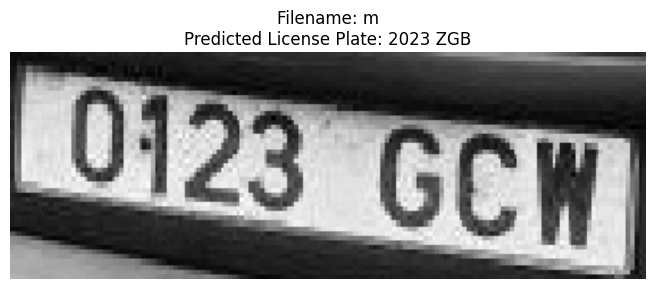

In [6]:
# Display Results

# Function to visualize images alongside their predicted license plate text
def display_results(images, predictions, decoded_texts, image_names):
    """
    Display images alongside their predicted license plate text using Matplotlib.
    
    Args:
        images (np.ndarray): Array of preprocessed images.
        predictions (list of np.ndarray): List of predictions for each character position.
        decoded_texts (list): List of decoded license plate texts.
        image_names (list): List of image file names.
    """
    num_images = len(images)
    plt.figure(figsize=(15, num_images * 3))
    
    for i in range(num_images):
        plt.subplot(num_images, 1, i + 1)
        plt.imshow(images[i].squeeze(), cmap='gray')  # Display the image in grayscale
        plt.title(f"Filename: {image_names[i]}\nPredicted License Plate: {decoded_texts[i]}")
        plt.axis('off')
    
    plt.tight_layout()
    plt.show()

# Call the function to display results
display_results(preprocessed_image, predictions, decoded_texts, "matricula2.jpg")